## Obtencion de datos

In [156]:
DATASET_PATH = './dataset'

## Análisis exploratorio inicial

In [157]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Cargamos Dataset

In [158]:
#guardamos el dataset
df = pd.read_csv(DATASET_PATH+'/PS_20174392719_1491204439457_log.csv')

Imprimimos primeras 20 observaciones

In [159]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Obtenemos columnas del dataset

In [160]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Tamaño del dataset

In [161]:
df.shape

(6362620, 11)

Tipo de data de cada columna

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Como se puede observar tenemos 3 variables categoricas:
1. type
2. nameOrig
3. nameDest

Buscamos datos nulos en el dataset completo

In [163]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Podemos observar que no se encuentran datos nulos en este dataset. Ahora buscamos si esta balanceado el dataset

In [164]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

A simple vista parece ser un dataset desbalanceado. Ahora revisamos relación y distribución entre variables

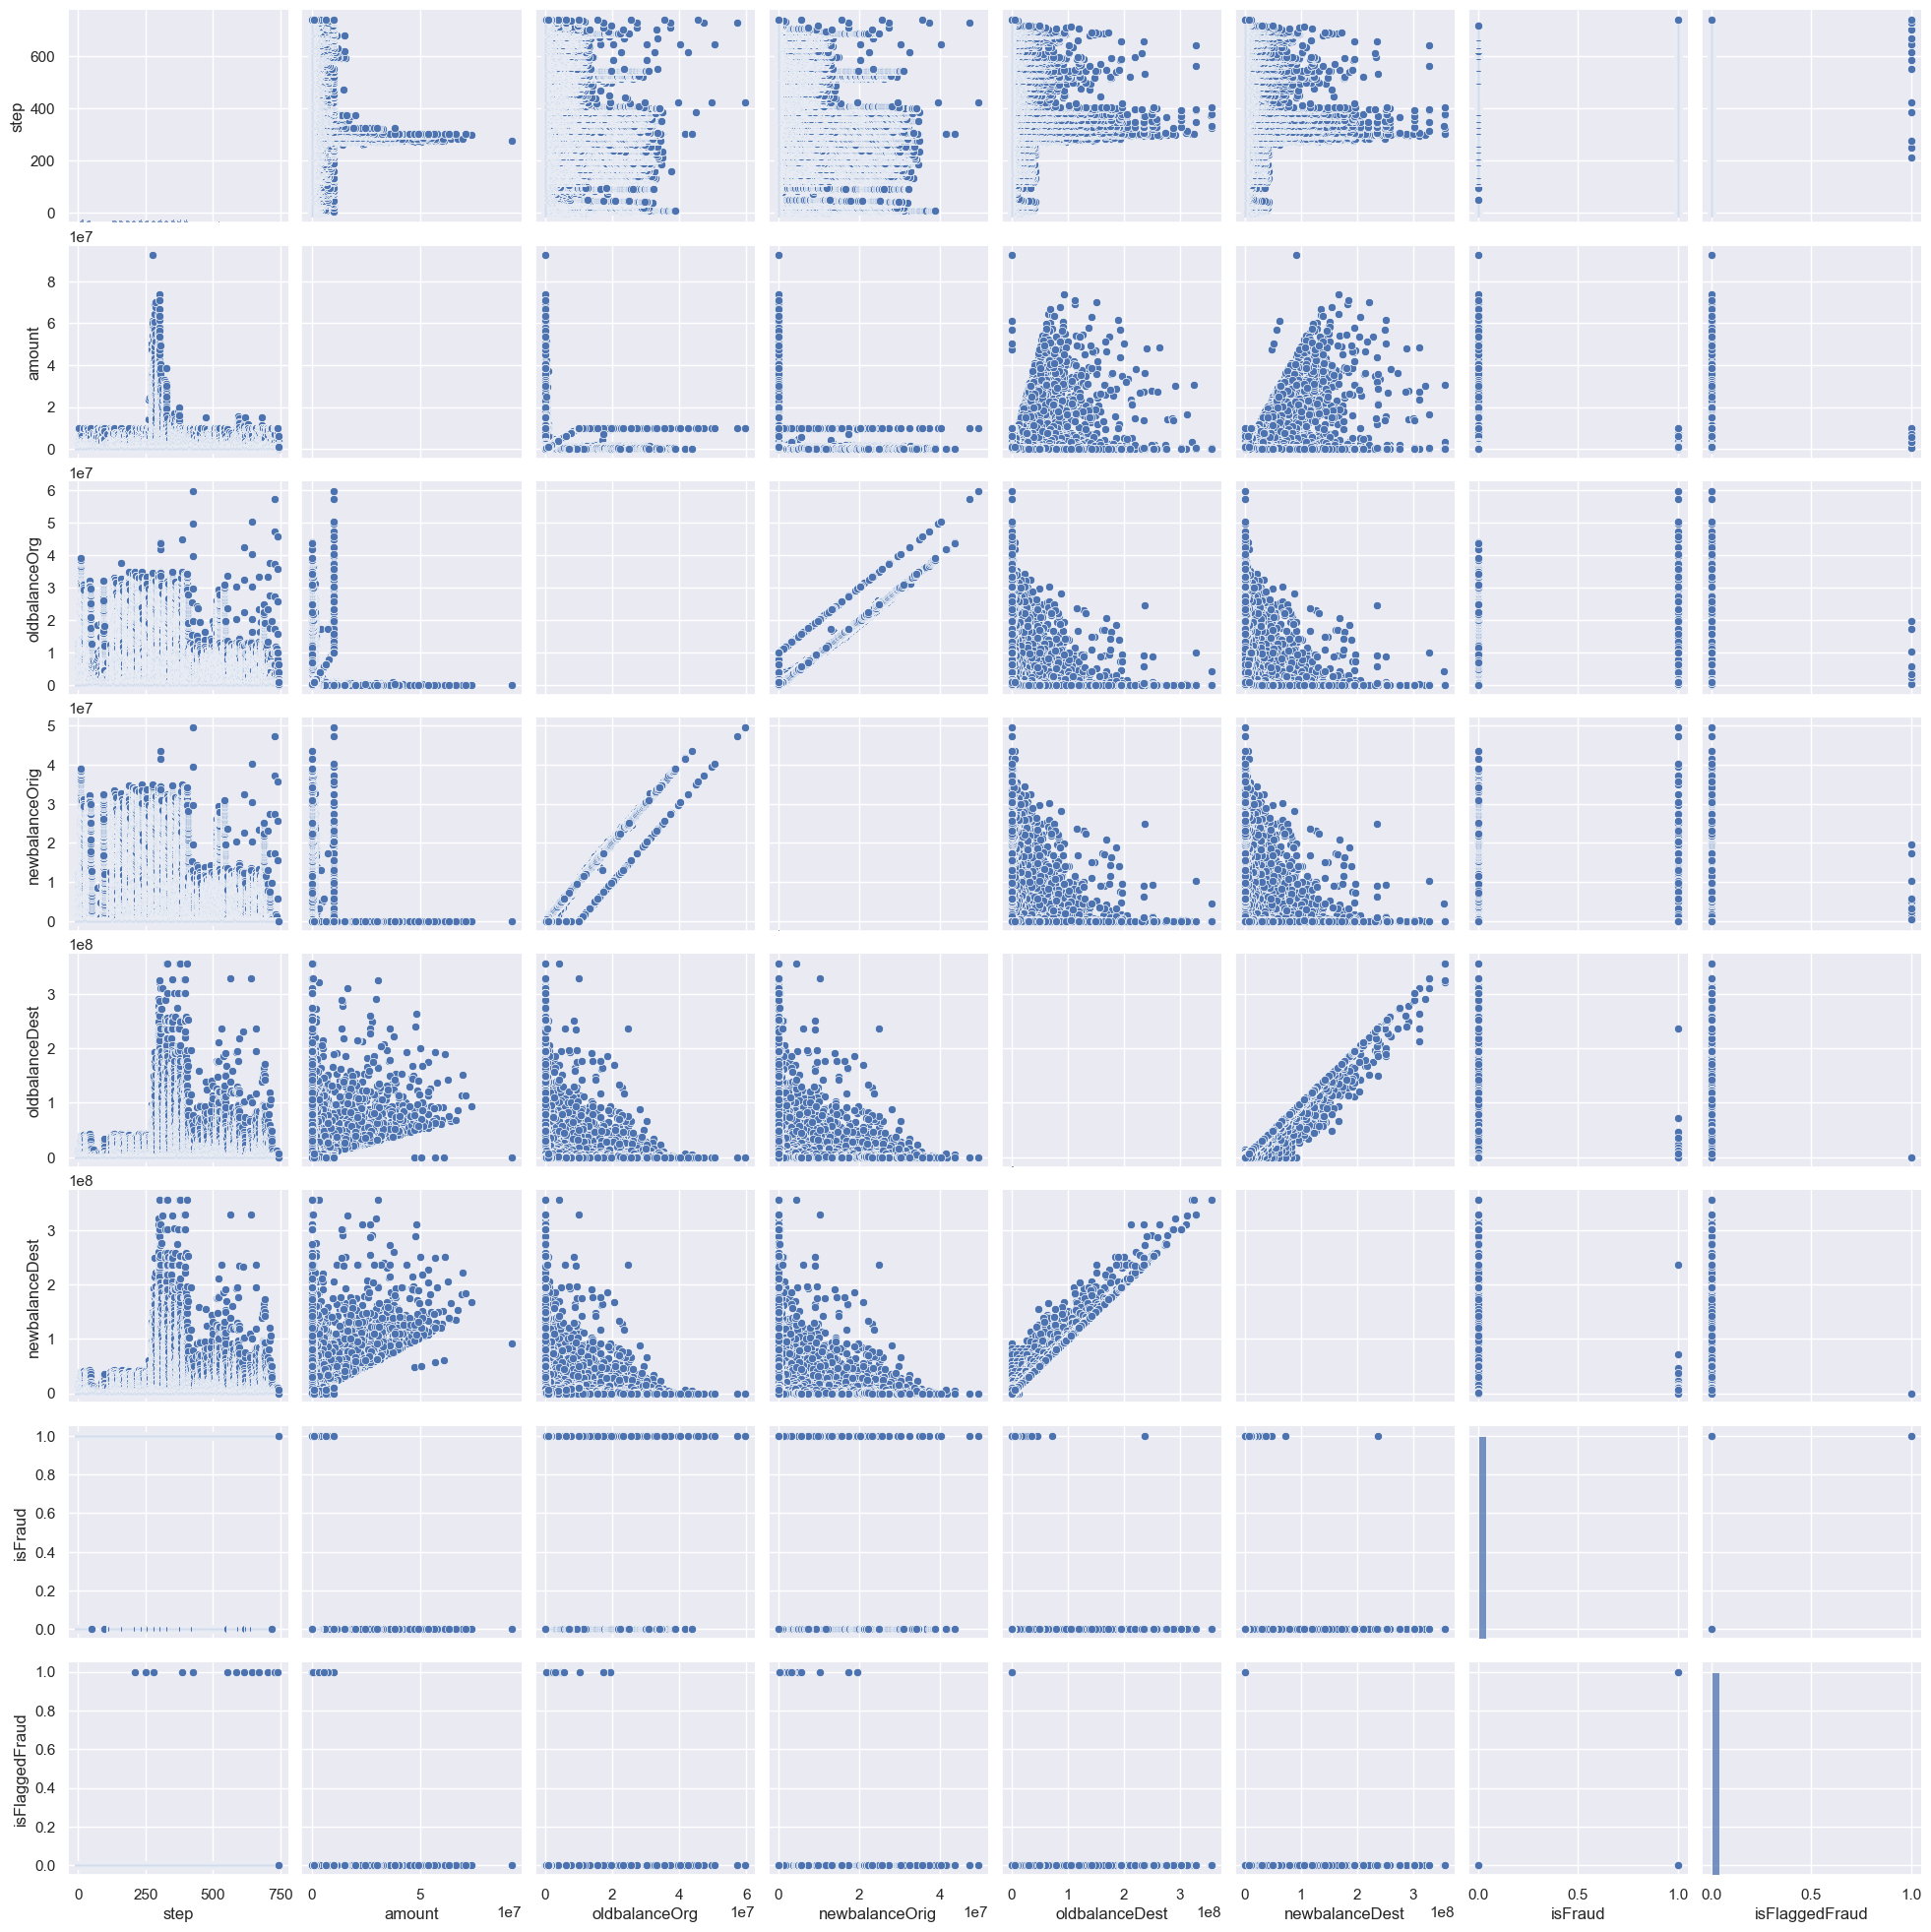

In [165]:
sns.pairplot(df)

Por la relacion que nos muestran las graficas anteriores entre las variables independientes (X o features) y la variable dependiente (Y o target) podemos resaltar lo siguiente:
1. La caracteristica "oldblanceOrg" y "newbalanceOrig" estan bastante relacionadas a los casos donde se detecto un fraude.
2. En general "oldblanceOrg" y "newbalanceOrig" siguen una relación creciente entre si.
3. Las distribuciones en general de las variables independientes con respecto a la dependiente son binomiales.

De los datos tambien podemos intuir que las variables "nameDest" y "nameOrig" son no informativas porque son nombres de transacciones.

## Preprocesamiento de Datos

In [181]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE

In [182]:
# Dividimos los datos
train_ratio = 0.90
test_ratio = 0.10

X = df.drop(columns='isFraud')
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)
print("Train: ", X_train.shape,y_train.shape)
print("Test:", X_test.shape,y_test.shape)

Train:  (5726358, 10) (5726358,)
Test: (636262, 10) (636262,)


In [183]:
# Etiquetas en train y test
# Etiquetas unicas que estan en train pero no en test y viceversa

X_train_label_unique = [i for i in X_train.type.unique() if i not in X_test.type.unique()]
print("Etiquetas que no estan presentes en X_test, pero si en X_train: ",len(X_train_label_unique))

X_test_label_unique = [i for i in X_test.type.unique() if i not in X_train.type.unique()]
print("Etiquetas que no estan presentes en X_train, pero si en X_test: ",len(X_test_label_unique))

Etiquetas que no estan presentes en X_test, pero si en X_train:  0
Etiquetas que no estan presentes en X_train, pero si en X_test:  0


Podemos observar que las etiquetas de "types" estan correctamente distribuidas.

In [184]:
# Eliminamos las caracteristicas no informativas.
X_train = X_train.drop(columns=['nameDest', 'nameOrig'])
print("Train: ", X_train.shape)

X_test = X_test.drop(columns=['nameDest', 'nameOrig'])
print("Test: ", X_test.shape)

Train:  (5726358, 8)
Test:  (636262, 8)


In [185]:
# Tratamos las variables categoricas.
X_train_cat = X_train.select_dtypes(include='object')
X_test_cat = X_train.select_dtypes(include='object')

encoded = OneHotEncoder(dtype='uint8')
X_train_encod = encoded.fit_transform(X_train_cat)
X_test_encod = encoded.fit_transform(X_test_cat)

# Volvemos a formar los dataframes, ya que, al encodearlos quedan como arreglos
X_train_encoded = pd.DataFrame(X_train_encod)
X_test_encoded = pd.DataFrame(X_test_encod)

In [186]:
#  Vemos los datos de X_train sin escalar
num_X_train = X_train.select_dtypes(include='number') #Tomamos todos los dtype number
num_X_train.var(ddof=0)

step              2.025925e+04
amount            3.642359e+11
oldbalanceOrg     8.333677e+12
newbalanceOrig    8.541515e+12
oldbalanceDest    1.154711e+13
newbalanceDest    1.349325e+13
isFlaggedFraud    2.095568e-06
dtype: float64

In [187]:
#  Vemos los datos de X_test sin escalar
num_X_test = X_test.select_dtypes(include='number') #Tomamos todos los dtype number
num_X_test.var(ddof=0)

step              2.025061e+04
amount            3.683235e+11
oldbalanceOrg     8.416332e+12
newbalanceOrig    8.626926e+12
oldbalanceDest    1.162025e+13
newbalanceDest    1.355296e+13
isFlaggedFraud    6.286679e-06
dtype: float64

In [188]:
# Datos escalados
scale = StandardScaler()
X_train_scaled = scale.fit_transform(num_X_train)#Escalamos los datos tipo number
X_test_scaled = scale.fit_transform(num_X_test)

# Volvemos a formar los dataframes, ya que, al escalarlo quedan como arreglos
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_X_test.columns)

In [189]:
X_train_scaled.var(ddof=0)

step              1.0
amount            1.0
oldbalanceOrg     1.0
newbalanceOrig    1.0
oldbalanceDest    1.0
newbalanceDest    1.0
isFlaggedFraud    1.0
dtype: float64

In [190]:
X_test_scaled.var(ddof=0)

step              1.0
amount            1.0
oldbalanceOrg     1.0
newbalanceOrig    1.0
oldbalanceDest    1.0
newbalanceDest    1.0
isFlaggedFraud    1.0
dtype: float64

In [191]:
# Unimos de vuelta el dataset con los datos escalados y encodeados
X_train = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test = pd.concat([X_test_scaled, X_test_encoded], axis=1)

In [192]:
X_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,0
0,-1.625788,-0.284967,-0.280728,-0.287248,0.838885,1.712742,-0.001448,"(0, 1)\t1"
1,0.615404,1.628812,-0.288694,-0.292425,0.460344,0.708578,-0.001448,"(0, 4)\t1"
2,-0.396294,-0.050213,-0.210358,-0.266217,0.296976,0.281589,-0.001448,"(0, 1)\t1"
3,0.629456,-0.207823,-0.288694,-0.292425,-0.172217,-0.178347,-0.001448,"(0, 1)\t1"
4,-1.056707,-0.207718,2.864191,2.840509,0.692702,0.531178,-0.001448,"(0, 0)\t1"


Balanceamos las etiquetas target

In [193]:
# revisamos etiquetas de train y test
print("etiquetas en train: ",y_train.value_counts(normalize=True))
print("etiquetas en test: ", y_test.value_counts(normalize=True))

etiquetas en train:  isFraud
0    0.998712
1    0.001288
Name: proportion, dtype: float64
etiquetas en test:  isFraud
0    0.998681
1    0.001319
Name: proportion, dtype: float64


In [194]:
X_train.dtypes

step              float64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud    float64
0                  object
dtype: object

Usamos oversampling

In [195]:
#BorderlineSMOTE
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_train_sb, y_train_sb = smote_border.fit_resample(X_train, y_train)

print("Clases balanceadas train: ",y_train_sb.value_counts(normalize=True))
print("Clases no balanceadas test: ",y_test.value_counts(normalize=True))

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

## Modelos